In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
position = pd.read_csv("training-dataset-job-categorisation[1].csv")

In [3]:
position

,job_id,job_title,category,subcategory,role,Updated category,importance
0,74630583,Procurement Executive (Contract),"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",procurement-executive,NaN,Niveau 1
1,74660602,Account Executive/ Assistant,Accounting,Bookkeeping & Small Practice Accounting,executive-assistant,NaN,Niveau 3
2,74679363,Purchasing Executive,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",purchasing-executive,Operations/Logistics,Niveau 1
3,74657915,PURCHASING EXECUTIVE,Engineering,Project Engineering,purchasing-executive,Operations/Logistics,Niveau 1
4,74662794,Accounts Assistant (AP),Accounting,Accounts Payable,accounts-assistant,NaN,Niveau 3
...,...,...,...,...,...,...,...
39690,76659690,Hotel Manager,Hospitality & Tourism,Management,hotel-manager,NaN,Niveau 3
39691,76653277,"Marketing Specialist, APAC",Marketing & Communications,Marketing Communications,marketing-specialist,Marketing/Sales,NaN
39692,76674488,Talent Acquisition Partner,Human Resources & Recruitment,Recruitment - Internal,talent-acquisition-partner,Human Resources (HR),NaN
39693,76658887,Motor Insurance Executive,Insurance & Superannuation,Brokerage,Motor-Insurance-Executive,NaN,Niveau 1


In [4]:
print(position.columns)

Index(['job_id', 'job_title', 'category', 'subcategory', 'role',
       'Updated category', 'importance'],
      dtype='object')


In [5]:
# Check for non-numeric columns
print(position.dtypes)

job_id               int64
job_title           object
category            object
subcategory         object
role                object
Updated category    object
importance          object
dtype: object


In [6]:
position.isnull().sum()

job_id                  0
job_title               0
category                0
subcategory             0
role                  875
Updated category    10973
importance          19888
dtype: int64

In [7]:
position["Updated category"].fillna(position["Updated category"].mode()[0], inplace=True)

In [8]:
print(position)

         job_id                         job_title  \
0      74630583  Procurement Executive (Contract)   
1      74660602      Account Executive/ Assistant   
2      74679363              Purchasing Executive   
3      74657915              PURCHASING EXECUTIVE   
4      74662794           Accounts Assistant (AP)   
...         ...                               ...   
39690  76659690                     Hotel Manager   
39691  76653277        Marketing Specialist, APAC   
39692  76674488        Talent Acquisition Partner   
39693  76658887         Motor Insurance Executive   
39694  76653289   Banca Specialist (Klang Valley)   

                                   category  \
0      Manufacturing, Transport & Logistics   
1                                Accounting   
2      Manufacturing, Transport & Logistics   
3                               Engineering   
4                                Accounting   
...                                     ...   
39690                 Hospitality 

In [9]:
# Forward fill 
position["role"].ffill(inplace=True)
#similarly you can use bacward fill just write bfill instead of ffill

In [10]:
print(position)

         job_id                         job_title  \
0      74630583  Procurement Executive (Contract)   
1      74660602      Account Executive/ Assistant   
2      74679363              Purchasing Executive   
3      74657915              PURCHASING EXECUTIVE   
4      74662794           Accounts Assistant (AP)   
...         ...                               ...   
39690  76659690                     Hotel Manager   
39691  76653277        Marketing Specialist, APAC   
39692  76674488        Talent Acquisition Partner   
39693  76658887         Motor Insurance Executive   
39694  76653289   Banca Specialist (Klang Valley)   

                                   category  \
0      Manufacturing, Transport & Logistics   
1                                Accounting   
2      Manufacturing, Transport & Logistics   
3                               Engineering   
4                                Accounting   
...                                     ...   
39690                 Hospitality 

In [11]:
position["importance"].fillna(position["importance"].mode()[0], inplace=True)

In [12]:
position.isnull().sum()

job_id              0
job_title           0
category            0
subcategory         0
role                0
Updated category    0
importance          0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()

In [15]:
position["importance"] = label_encoder.fit_transform(position["importance"])

In [16]:
position

,job_id,job_title,category,subcategory,role,Updated category,importance
0,74630583,Procurement Executive (Contract),"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",procurement-executive,Operations/Logistics,2
1,74660602,Account Executive/ Assistant,Accounting,Bookkeeping & Small Practice Accounting,executive-assistant,Operations/Logistics,4
2,74679363,Purchasing Executive,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",purchasing-executive,Operations/Logistics,2
3,74657915,PURCHASING EXECUTIVE,Engineering,Project Engineering,purchasing-executive,Operations/Logistics,2
4,74662794,Accounts Assistant (AP),Accounting,Accounts Payable,accounts-assistant,Operations/Logistics,4
...,...,...,...,...,...,...,...
39690,76659690,Hotel Manager,Hospitality & Tourism,Management,hotel-manager,Operations/Logistics,4
39691,76653277,"Marketing Specialist, APAC",Marketing & Communications,Marketing Communications,marketing-specialist,Marketing/Sales,4
39692,76674488,Talent Acquisition Partner,Human Resources & Recruitment,Recruitment - Internal,talent-acquisition-partner,Human Resources (HR),4
39693,76658887,Motor Insurance Executive,Insurance & Superannuation,Brokerage,Motor-Insurance-Executive,Operations/Logistics,2


In [17]:
print("\nDataFrame with Label Encoding:") 
print(position)


DataFrame with Label Encoding:
         job_id                         job_title  \
0      74630583  Procurement Executive (Contract)   
1      74660602      Account Executive/ Assistant   
2      74679363              Purchasing Executive   
3      74657915              PURCHASING EXECUTIVE   
4      74662794           Accounts Assistant (AP)   
...         ...                               ...   
39690  76659690                     Hotel Manager   
39691  76653277        Marketing Specialist, APAC   
39692  76674488        Talent Acquisition Partner   
39693  76658887         Motor Insurance Executive   
39694  76653289   Banca Specialist (Klang Valley)   

                                   category  \
0      Manufacturing, Transport & Logistics   
1                                Accounting   
2      Manufacturing, Transport & Logistics   
3                               Engineering   
4                                Accounting   
...                                     ...   
39

In [18]:
position1 = position.drop(columns=["job_id","importance"])

In [19]:
X = pd.DataFrame(position1)

In [20]:
string_columns = ["job_title","category","subcategory","role","Updated category"]

In [21]:
# Apply Label Encoding to each string column 
for col in string_columns: 
    X[col] = label_encoder.fit_transform(X[col])

In [22]:
print("\nDataFrame after Label Encoding:")
print(X)


DataFrame after Label Encoding:
       job_title  category  subcategory  role  Updated category
0          15656        20          230  2712                 7
1            750         0           37  1738                 7
2          16399        20          230  2840                 7
3          14938        11          225  2840                 7
4            935         0            2   776                 7
...          ...       ...          ...   ...               ...
39690       9975        15          154  1975                 7
39691      13610        21          168  2388                 6
39692      22048        16          236  3362                 3
39693      13880        18           39   472                 7
39694       3287         3           32  3260                 2

[39695 rows x 5 columns]


In [23]:
y =( position.iloc[:,6]).values

In [24]:
y

array([2, 4, 2, ..., 4, 2, 4])

In [25]:
y_reshape = y.reshape(-1,1)

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
imputer = SimpleImputer(strategy="mean")

In [28]:
Y = imputer.fit_transform(y_reshape)

In [29]:
print(Y)

[[2.]
 [4.]
 [2.]
 ...
 [4.]
 [2.]
 [4.]]


In [31]:
#Calculate the correlation matrix 
cor=X.corr()

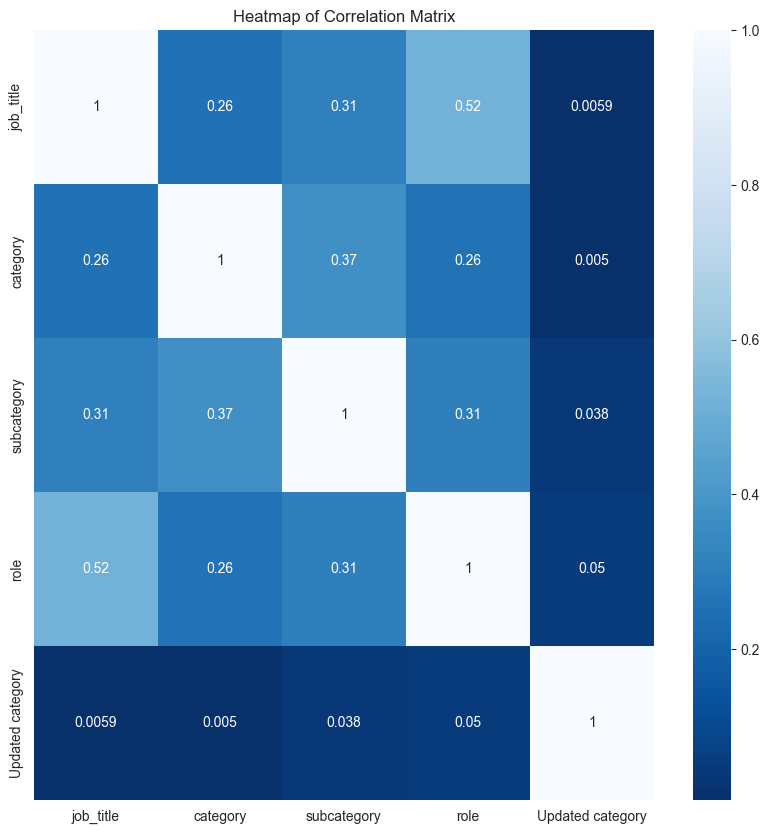

In [32]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues_r)
plt.title("Heatmap of Correlation Matrix") 
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [35]:
X_train.shape

(31756, 5)

In [36]:
X_test.shape

(7939, 5)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier(n_estimators=90)

In [55]:
model.fit(X_train,y_train)

C:\Users\HP\.conda\envs\tf1\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=90)

In [56]:
y_pred = model.predict(X_test)

In [57]:
y_pred

array([4., 4., 4., ..., 4., 4., 4.])

In [58]:
y_test

array([[4.],
       [4.],
       [4.],
       ...,
       [4.],
       [4.],
       [4.]])

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
print (confusion_matrix(y_test,y_pred))

[[1095    2  118    4    0]
 [   3   67   23    2    0]
 [  79    5 5851   48   22]
 [   9    3  109  271    2]
 [   6    0   43    5  172]]


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         2.0       0.92      0.90      0.91      1219
         3.0       0.87      0.71      0.78        95
         4.0       0.95      0.97      0.96      6005
         5.0       0.82      0.69      0.75       394
         6.0       0.88      0.76      0.82       226

    accuracy                           0.94      7939
   macro avg       0.89      0.81      0.84      7939
weighted avg       0.94      0.94      0.94      7939

